<a href="https://colab.research.google.com/github/JSernaOne/Actividad001/blob/main/predici%C3%B3nLenguajeDeSe%C3%B1as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# Autores:
# George Eiver Chamorro Patiño - 2259521
# Jhojan Serna Henao - 2259504
# Faber Alexis Solis Gamboa - 2259714

!pip install opendatasets
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical #ONE HOT ENCODING
from keras.metrics import Precision, Recall
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import classification_report
! pip install kaggle
! kaggle datasets download datamunge/sign-language-mnist

Dataset URL: https://www.kaggle.com/datasets/datamunge/sign-language-mnist
License(s): CC0-1.0
sign-language-mnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#dataset_link="https://www.kaggle.com/datasets/datamunge/sign-language-mnist/data"
#od.download(dataset_link)
# georgepatioc117
# 556cef62bc52d0cc641a21827808f97c

In [84]:
os.chdir("/content/sign-language-mnist")
os.listdir()

['american_sign_language.PNG',
 'sign-language-mnist.zip',
 'sign_mnist_train',
 'sign_mnist_test.csv',
 'amer_sign2.png',
 'amer_sign3.png',
 'sign_mnist_test',
 'sign_mnist_train.csv']

In [85]:
train="sign_mnist_train.csv" #Extraer los datos de entrenamiento
test ="sign_mnist_test.csv" #Extraer los datos de prueba
train_df = pd.read_csv(train) #Leer y definir los datos de entrenamiento
test_df = pd.read_csv(test) #Leer y definir los datos de prueba


Normalizar los datos diviendo por 255 y extraer etiquetas

In [ ]:
train_x = train_df.drop('label',axis=1)/255.0
test_x = test_df.drop('label',axis=1)/255.0
train_y = train_df['label'] #Etiquetas del entrenamiento
test_y = test_df['label'] #Etiquetas de la prueba

Redimensionar las imagenes para que sea 28*28


In [ ]:
train_x = train_x.values.reshape(-1, 28, 28)
test_x = test_x.values.reshape(-1, 28, 28)

One Hot Encoding, las categorias se toman como clases (columnas)

In [ ]:
train_y = to_categorical(train_y,25)
test_y = to_categorical(test_y,25)

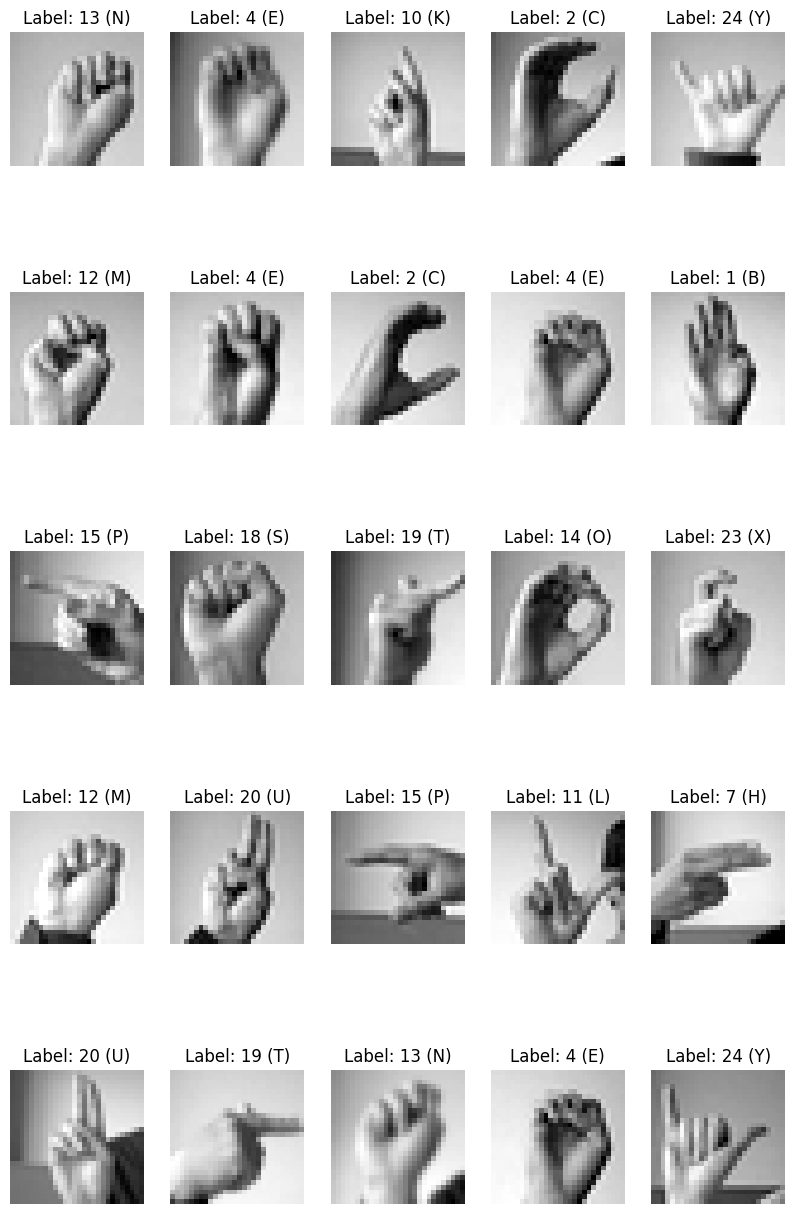

In [ ]:
# Función para mostrar las imágenes
# Número de imágenes que queremos mostrar
num_images = 25

def label_to_letter(label):
    # Convertir la etiqueta a la letra correspondiente del alfabeto inglés
    return chr(ord('A') + np.argmax(label)) # Find the index of the maximum value (the 'hot' index) in the one-hot encoded array

# Seleccionar índices aleatorios del conjunto de datos de prueba
indices = np.random.randint(0, test_x.shape[0], size=num_images)

# Crear una figura para mostrar las imágenes
plt.figure(figsize=(10, 50))

for i, index in enumerate(indices):
    # Seleccionar la imagen y su etiqueta
    image = test_x[index]
    label = test_y[index]
    letter = label_to_letter(label)  # Obtener la letra correspondiente

    plt.subplot(15, 5, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {np.argmax(label)} ({letter})')
    plt.axis('off')

plt.show()

Inicializar Métricas

In [ ]:
precision = Precision()
recall = Recall()

#Primer Modelo

El primer modelo utiliza la función de activación ReLU en sus capas ocultas, que es una opción popular para redes neuronales
debido a su capacidad para manejar problemas de desvanecimiento de gradientes. Las capas ocultas tienen 128 neuronas cada una,
proporcionando suficiente capacidad para aprender representaciones complejas. La capa de salida tiene 25 neuronas con activación
softmax para clasificación multiclase. El optimizador Adam es elegido por su eficiencia y efectividad en el ajuste de parámetros. También si configuro el batch size el cual determina cuantas muestras se utilizara para calcular el gradiante descendiente en cada iteración, en este caso el valor es de 32 lo que indica que tendrá mayor ruido pero convergera más rapido.

In [ ]:
# Dividir el conjunto de entrenamiento en conjuntos de entrenamiento y validación en 80% y 20%
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

# Definición del primer modelo
first_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),  # Primera capa oculta con 128 neuronas y activación ReLU
    Dense(128, activation='relu'),  # Segunda capa oculta con 128 neuronas y activación ReLU
    Dense(64, activation='relu'),   # Tercera capa oculta con 64 neuronas y activación ReLU
    Dense(25, activation='softmax') # Capa de salida con 25 neuronas (para clasificación en 25 clases) y activación softmax
])

# Configuración del modelo
first_model.compile(optimizer= 'adam',
                    loss= 'categorical_crossentropy',
                    metrics=['accuracy',precision, recall])


# Entrenamiento del modelo
first_history = first_model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(val_x, val_y))

# Evaluación del modelo
first_loss, first_accuracy, first_precision, first_recall = first_model.evaluate(test_x, test_y)
print("Test Loss:", first_loss)
print("Test Accuracy:", first_accuracy)
print("Test Precision:", first_precision)
print("Test Recall:", first_recall)


Epoch 1/10
687/687 [==============================] - 5s 6ms/step - loss: 2.2342 - accuracy: 0.3011 - precision_3: 0.7799 - recall_3: 0.0836 - val_loss: 1.6210 - val_accuracy: 0.4582 - val_precision_3: 0.7508 - val_recall_3: 0.2475
Epoch 2/10
687/687 [==============================] - 4s 5ms/step - loss: 1.2494 - accuracy: 0.5807 - precision_3: 0.8193 - recall_3: 0.3772 - val_loss: 1.0979 - val_accuracy: 0.6148 - val_precision_3: 0.7700 - val_recall_3: 0.4549
Epoch 3/10
687/687 [==============================] - 3s 5ms/step - loss: 0.8248 - accuracy: 0.7230 - precision_3: 0.8572 - recall_3: 0.5881 - val_loss: 0.6553 - val_accuracy: 0.7725 - val_precision_3: 0.8839 - val_recall_3: 0.6740
Epoch 4/10
687/687 [==============================] - 3s 4ms/step - loss: 0.5619 - accuracy: 0.8104 - precision_3: 0.8949 - recall_3: 0.7298 - val_loss: 0.5267 - val_accuracy: 0.8345 - val_precision_3: 0.8898 - val_recall_3: 0.7722
Epoch 5/10
687/687 [==============================] - 4s 5ms/step - loss

# Segundo Modelo
El segundo modelo emplea la función de activación Tanh y cuenta con dos capas ocultas. La función Tanh es adecuada para datos que están centrados en cero
y puede resultar en un mejor rendimiento en algunos casos comparado con ReLU. Similar al primer modelo, las capas ocultas tienen 128 neuronas cada una.
La capa de salida y el optimizador son los mismos que en el primer modelo. La comparación entre estos dos modelos nos permitirá ver el impacto de cambiar
la función de activación en el rendimiento del modelo.

In [ ]:
# Definición del segundo modelo
second_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    Dense(128, activation='tanh'),  # Primera capa oculta con 128 neuronas y activación Tanh
    Dense(64, activation='tanh'),  # Segunda capa oculta con 64 neuronas y activación Tanh
    Dense(25, activation='softmax')  # Capa de salida con 25 neuronas (para clasificación en 25 clases) y activación softmax
])

# Configuración del modelo
second_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy', precision, recall])

# Entrenamiento del modelo
second_history = second_model.fit(train_x, train_y, epochs=10, batch_size = 64, validation_data=(test_x, test_y))

second_loss, second_accuracy, second_presicion, second_recall = second_model.evaluate(test_x, test_y)
print("Test Loss:", second_loss)
print("Test Accuracy:", second_accuracy)
print("Test Precision:", second_presicion)
print("Test Recall:", second_recall)

Epoch 1/10
344/344 [==============================] - 4s 8ms/step - loss: 2.0952 - accuracy: 0.3921 - precision_3: 0.8118 - recall_3: 0.2556 - val_loss: 1.8327 - val_accuracy: 0.4179 - val_precision_3: 0.8176 - val_recall_3: 0.1913
Epoch 2/10
344/344 [==============================] - 2s 5ms/step - loss: 1.0768 - accuracy: 0.6857 - precision_3: 0.9138 - recall_3: 0.4268 - val_loss: 1.1992 - val_accuracy: 0.6320 - val_precision_3: 0.8252 - val_recall_3: 0.4707
Epoch 3/10
344/344 [==============================] - 2s 4ms/step - loss: 0.7270 - accuracy: 0.7942 - precision_3: 0.9281 - recall_3: 0.6281 - val_loss: 0.9837 - val_accuracy: 0.6832 - val_precision_3: 0.8285 - val_recall_3: 0.5569
Epoch 4/10
344/344 [==============================] - 2s 4ms/step - loss: 0.5167 - accuracy: 0.8620 - precision_3: 0.9459 - recall_3: 0.7567 - val_loss: 1.0152 - val_accuracy: 0.6803 - val_precision_3: 0.7999 - val_recall_3: 0.5830
Epoch 5/10
344/344 [==============================] - 1s 4ms/step - loss

# Tercer Modelo
El tercer modelo cuenta con 5 capas ocultas con la función de ativación sigmoide y  utiliza el optimizador SGD (Stochastic Gradient Descent).
Este optimizador es menos complejo que Adam, pero como resultado obtuvimos tiempos más lentos ya que el ajuste del SGD requiere de una mayor precisión en la tasa de aprendizaje. También se aumento el batch size para que el entrenaiento sea más estable aunque con la posibilidad que se demore más en converger.
Al cambiar tanto el número de neuronas como el optimizador, podemos observar cómo estas variaciones afectan el rendimiento del modelo.

In [ ]:
# Definición del tercer modelo
third_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    Dense(256, activation='sigmoid'),  # Primera capa oculta con 256 neuronas y activación sigmoid
    Dense(128, activation='sigmoid'),  # Segunda capa oculta con 128 neuronas y activación sigmoid
    Dense(64, activation='sigmoid'),  # Tercera capa oculta con 64 neuronas y activación sigmoid
    Dense(32, activation='sigmoid'),  # Cuarta capa oculta con 32 neuronas y activación sigmoid
    Dense(16, activation='sigmoid'),  # Quinta capa oculta con 16 neuronas y activación sigmoid
    Dense(25, activation='softmax')  # Capa de salida con 25 neuronas (para clasificación en 25 clases) y activación softmax
])

# Configuración del modelo
third_model.compile(optimizer='sgd',
                    loss='categorical_crossentropy',
                    metrics=['accuracy', precision, recall])

# Entrenamiento del modelo
third_history = third_model.fit(train_x, train_y, epochs=20, batch_size = 256, validation_data=(test_x, test_y))

# Evaluación del modelo
third_loss, third_accuracy, third_precision, third_recall = third_model.evaluate(test_x, test_y)
print("Test Loss:", third_loss)
print("Test Accuracy:", third_accuracy)
print("Test Precision:", third_precision)
print("Test Recall:", third_recall)

Epoch 1/20
86/86 [==============================] - 2s 10ms/step - loss: 3.2966 - accuracy: 0.0375 - precision_3: 0.8160 - recall_3: 0.1834 - val_loss: 3.3046 - val_accuracy: 0.0549 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 2/20
86/86 [==============================] - 1s 7ms/step - loss: 3.2648 - accuracy: 0.0412 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 3.2804 - val_accuracy: 0.0342 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 3/20
86/86 [==============================] - 0s 6ms/step - loss: 3.2442 - accuracy: 0.0428 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 3.2642 - val_accuracy: 0.0342 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 4/20
86/86 [==============================] - 1s 6ms/step - loss: 3.2300 - accuracy: 0.0428 - precision_3: 0.0000e+00 - recall_3: 0.0000e+00 - val_loss: 3.2527 - val_accuracy: 0.0342 - val_precision_3: 0.0000e+00 - val_recall_3: 0.0000e+00
Epoch 5/20
86/86 [=====

#Cuarto Modelo
Para este modelo se utilizao la función de activaciób LeakyRelu la cual es una optimizacion de la Relu. La función Relu al obtener información la salida se vuelve cero, pero con la LeakyRelu solucionamos este problema introducce un pequeño gradiante para las entradas negativas mantiniendo a las neuronas activas. También se le agrego el método de regularización dropout que nos permite prevenir el sobrajuste en redes profundas

In [ ]:
fourth_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    Dense(256, activation='LeakyReLU'),  # Primera capa oculta con 256 neuronas y activación LeakyReLU
    Dropout(0.25),  # Regularización Dropout para evitar el sobreajuste
    Dense(256, activation='LeakyReLU'),  # Primera capa oculta con 128 neuronas y activación LeakyReLU
    Dense(128, activation='LeakyReLU'),  # Segunda capa oculta con 64 neuronas y activación LeakyReLU
    Dense(25, activation='softmax')  # Capa de salida con 25 neuronas (para clasificación en 25 clases) y activación softmax
])

# Configuración del modelo
fourth_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy', precision, recall])

# Entrenamiento del modelo
fourth_history = fourth_model.fit(train_x, train_y, epochs=10, batch_size=128, validation_data=(test_x, test_y))

# Evaluación del modelo
fourth_loss, fourth_accuracy, fourth_precision, fourth_recall = fourth_model.evaluate(test_x, test_y)
print("Test Loss:", fourth_loss)
print("Test Accuracy:", fourth_accuracy)
print("Test Precision:", fourth_precision)
print("Test Recall:", fourth_recall)

Epoch 1/10
172/172 [==============================] - 3s 7ms/step - loss: 2.0778 - accuracy: 0.3587 - precision_3: 0.7724 - recall_3: 0.1077 - val_loss: 1.4521 - val_accuracy: 0.5618 - val_precision_3: 0.8363 - val_recall_3: 0.3362
Epoch 2/10
172/172 [==============================] - 1s 5ms/step - loss: 1.0705 - accuracy: 0.6444 - precision_3: 0.8295 - recall_3: 0.4722 - val_loss: 1.1801 - val_accuracy: 0.6124 - val_precision_3: 0.7535 - val_recall_3: 0.4907
Epoch 3/10
172/172 [==============================] - 1s 5ms/step - loss: 0.7639 - accuracy: 0.7475 - precision_3: 0.8605 - recall_3: 0.6309 - val_loss: 0.9601 - val_accuracy: 0.6992 - val_precision_3: 0.8045 - val_recall_3: 0.6086
Epoch 4/10
172/172 [==============================] - 1s 5ms/step - loss: 0.5315 - accuracy: 0.8173 - precision_3: 0.8909 - recall_3: 0.7474 - val_loss: 1.0983 - val_accuracy: 0.6648 - val_precision_3: 0.7314 - val_recall_3: 0.6252
Epoch 5/10
172/172 [==============================] - 1s 5ms/step - loss

#Quinto Modelo
Para este modelo se decidio ajustar las configuraciones en base al modelo anterior para analizar los resultados y compararlos.

In [ ]:
# Quinto Modelo
fifth_model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar las imágenes 28x28 en vectores de 784 elementos
    Dense(256, activation='LeakyReLU'),  # Primera capa oculta con 256 neuronas y activación LeakyReLU
    Dropout(0.5),  # Regularización Dropout para evitar el sobreajuste
    Dense(128, activation='LeakyReLU'),  # Segunda capa oculta con 128 neuronas y activación LeakyReLU
    Dense(128, activation='LeakyReLU'),  # Tercera capa oculta con 128 neuronas y activación LeakyReLU
    Dense(25, activation='softmax')  # Capa de salida con 25 neuronas (para clasificación en 25 clases) y activación softmax
])

# Configuración del modelo
fifth_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy', precision, recall])

# Entrenamiento del modelo
fifth_history = fifth_model.fit(train_x, train_y, epochs=12, batch_size=64, validation_data=(test_x, test_y))

# Evaluación del modelo
new_loss, new_accuracy, new_precision, new_recall = fifth_model.evaluate(test_x, test_y)
print("Test Loss:", new_loss)
print("Test Accuracy:", new_accuracy)
print("Test Precision:", new_precision)
print("Test Recall:", new_recall)


Epoch 1/12
344/344 [==============================] - 3s 6ms/step - loss: 2.2492 - accuracy: 0.2992 - precision_3: 0.7784 - recall_3: 0.2662 - val_loss: 1.7417 - val_accuracy: 0.4647 - val_precision_3: 0.8078 - val_recall_3: 0.2197
Epoch 2/12
344/344 [==============================] - 2s 5ms/step - loss: 1.3761 - accuracy: 0.5360 - precision_3: 0.7685 - recall_3: 0.3491 - val_loss: 1.3143 - val_accuracy: 0.5573 - val_precision_3: 0.7679 - val_recall_3: 0.4083
Epoch 3/12
344/344 [==============================] - 2s 5ms/step - loss: 1.0175 - accuracy: 0.6527 - precision_3: 0.8040 - recall_3: 0.5084 - val_loss: 1.1427 - val_accuracy: 0.6380 - val_precision_3: 0.7259 - val_recall_3: 0.5284
Epoch 4/12
344/344 [==============================] - 2s 5ms/step - loss: 0.8101 - accuracy: 0.7178 - precision_3: 0.8309 - recall_3: 0.6109 - val_loss: 0.9308 - val_accuracy: 0.6912 - val_precision_3: 0.8062 - val_recall_3: 0.6003
Epoch 5/12
344/344 [==============================] - 2s 5ms/step - loss

Función para mostrar las gráficas

In [ ]:
#Función para graficar la pérdida y la precisión
def plot_metrics(history):
    plt.figure(figsize=(12, 4))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de validación')
    plt.title('Pérdida durante el entrenamiento y la validación')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de validación')
    plt.title('Precisión durante el entrenamiento y la validación')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.show()

Función que evalua los modelos

In [ ]:
#función para generar el reporte de clasificación
def evaluate_model(model, test_x, y_ttest_yest):
    # Predecir las etiquetas para los datos de prueba
    y_pred = model.predict(test_x)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = np.argmax(test_y, axis=1)

    # Generar el reporte de clasificación
    report = classification_report(y_true, y_pred_classes)
    print(report)

---Modelo Uno---

225/225 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       331
           1       1.00      0.87      0.93       432
           2       0.84      1.00      0.91       310
           3       0.90      0.89      0.90       245
           4       0.79      0.84      0.81       498
           5       0.76      0.99      0.86       247
           6       0.91      0.73      0.81       348
           7       0.88      0.84      0.86       436
           8       0.68      0.81      0.74       288
          10       0.74      0.57      0.65       331
          11       1.00      0.77      0.87       209
          12       0.63      0.52      0.57       394
          13       1.00      0.27      0.42       291
          14       0.89      0.69      0.78       246
          15       0.96      0.90      0.93       347
          16       0.78      0.87      0.82       164
        

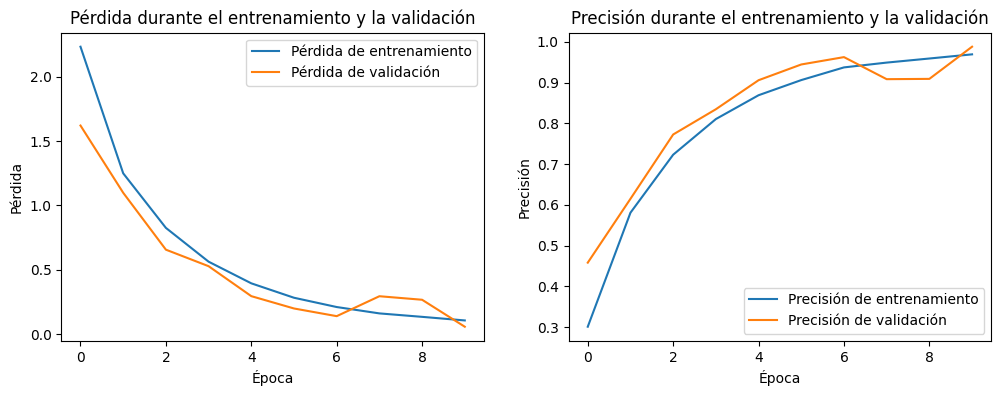

----Modelo Dos---

225/225 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       331
           1       0.95      0.90      0.93       432
           2       1.00      1.00      1.00       310
           3       0.99      1.00      0.99       245
           4       0.90      0.96      0.93       498
           5       0.70      0.96      0.81       247
           6       0.79      0.86      0.82       348
           7       0.78      0.87      0.82       436
           8       0.89      0.54      0.67       288
          10       0.74      0.67      0.71       331
          11       0.66      1.00      0.80       209
          12       0.73      0.77      0.75       394
          13       0.79      0.57      0.66       291
          14       0.90      0.64      0.75       246
          15       1.00      0.95      0.97       347
          16       0.71      0.87      0.79       164
       

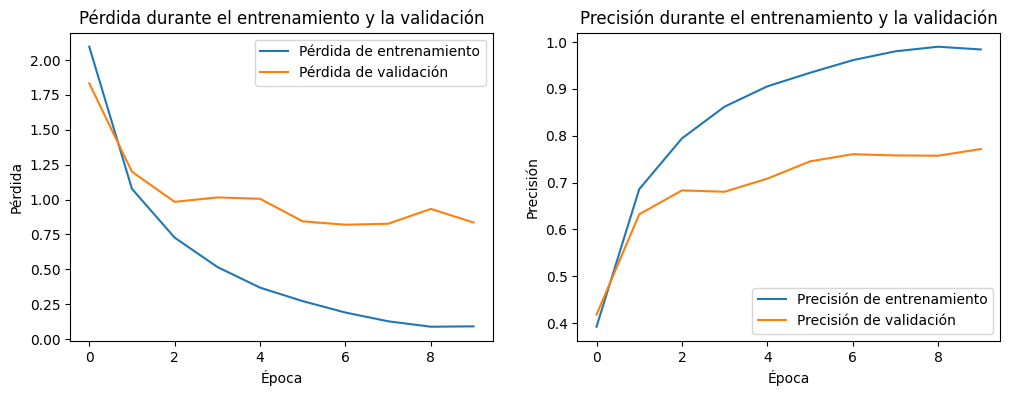

----Modelo Tres---

225/225 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       331
           1       0.00      0.00      0.00       432
           2       0.00      0.00      0.00       310
           3       0.00      0.00      0.00       245
           4       0.00      0.00      0.00       498
           5       0.00      0.00      0.00       247
           6       0.00      0.00      0.00       348
           7       0.00      0.00      0.00       436
           8       0.00      0.00      0.00       288
          10       0.00      0.00      0.00       331
          11       0.00      0.00      0.00       209
          12       0.00      0.00      0.00       394
          13       0.00      0.00      0.00       291
          14       0.00      0.00      0.00       246
          15       0.00      0.00      0.00       347
          16       0.00      0.00      0.00       164
      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


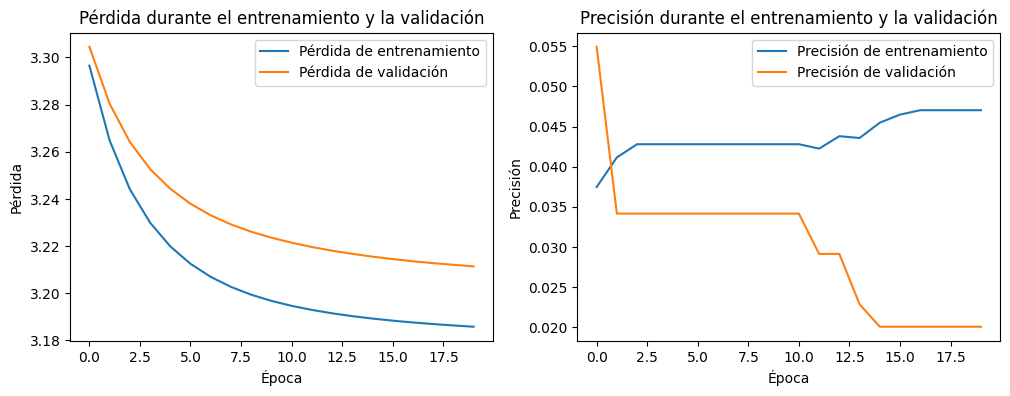

----Modelo Cuatro---

225/225 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       331
           1       1.00      0.97      0.98       432
           2       0.75      0.99      0.86       310
           3       0.82      0.83      0.83       245
           4       0.86      1.00      0.93       498
           5       0.90      0.88      0.89       247
           6       0.83      0.73      0.78       348
           7       0.95      0.86      0.90       436
           8       0.84      0.85      0.84       288
          10       0.65      0.62      0.63       331
          11       0.85      0.90      0.87       209
          12       0.69      0.78      0.73       394
          13       0.77      0.48      0.59       291
          14       0.88      0.75      0.81       246
          15       0.98      0.84      0.90       347
          16       0.51      0.87      0.64       164
    

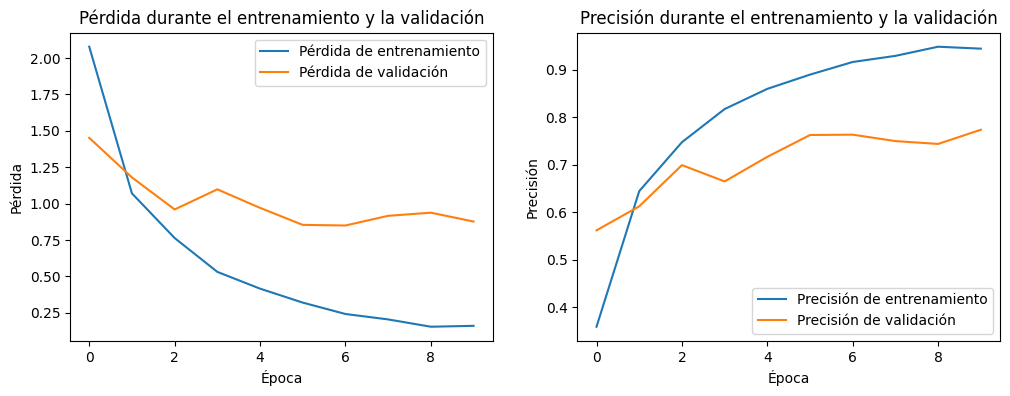

----Modelo Cinco---

225/225 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       1.00      0.86      0.92       432
           2       0.94      0.94      0.94       310
           3       0.68      0.92      0.78       245
           4       0.85      0.96      0.90       498
           5       0.86      1.00      0.92       247
           6       0.65      0.87      0.74       348
           7       1.00      0.88      0.94       436
           8       0.86      0.78      0.82       288
          10       0.76      0.84      0.80       331
          11       0.68      1.00      0.81       209
          12       0.86      0.69      0.76       394
          13       0.82      0.62      0.71       291
          14       1.00      0.84      0.91       246
          15       0.97      0.94      0.95       347
          16       0.60      1.00      0.75       164
     

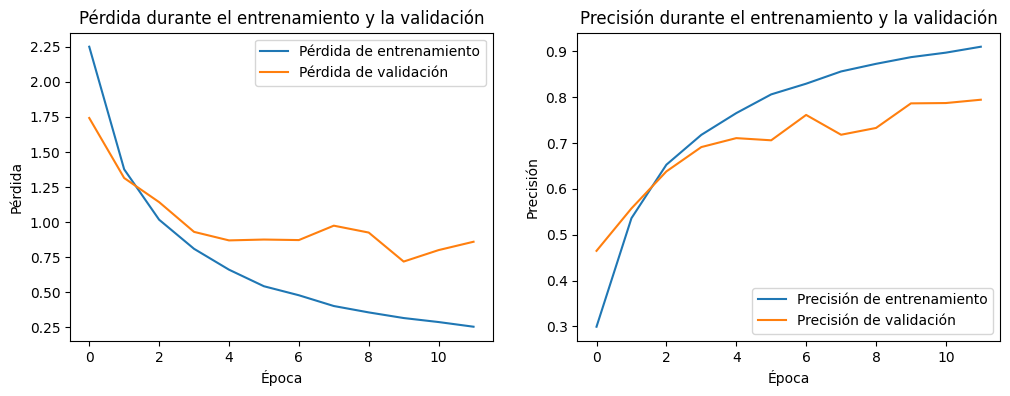

In [ ]:
print("---Modelo Uno---\n")
evaluate_model(first_model, test_x, test_y)
print("---Modelo Uno---\n")
plot_metrics(first_history)

print("----Modelo Dos---\n")
evaluate_model(second_model, test_x, test_y)
print("----Modelo Dos---\n")
plot_metrics(second_history)

print("----Modelo Tres---\n")
evaluate_model(third_model, test_x, test_y)
print("----Modelo Tres---\n")
plot_metrics(third_history)

print("----Modelo Cuatro---\n")
evaluate_model(fourth_model, test_x, test_y)
print("----Modelo Cuatro---\n")
plot_metrics(fourth_history)

print("----Modelo Cinco---\n")
evaluate_model(fifth_model, test_x, test_y)
print("----Modelo Cinco---\n")
plot_metrics(fifth_history)

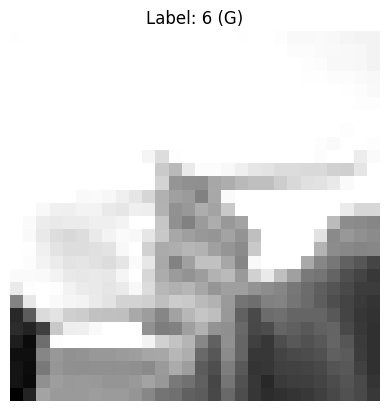

1/1 [==============================] - 0s 18ms/step
True Label: 6 (G)
First Model Prediction: 6
Second Model Prediction: 6
Third Model Prediction: 17
Fourth Model Prediction: 6
Fifth Model Prediction: 6


In [ ]:
### Prueba de modelos con una imagen individual

# Para evaluar el rendimiento de cada modelo con una imagen individual del dataset de prueba, seleccionamos una imagen al azar y mostramos la etiqueta verdadera junto con las predicciones de cada modelo.

#### Imagen seleccionada
# *La imagen a continuación muestra el dato seleccionado aleatoriamente del conjunto de prueba con su etiqueta verdadera.*

def label_to_letter(label):
    # Convertir la etiqueta a la letra correspondiente del alfabeto inglés
    return chr(ord('A') + np.argmax(label))

# Seleccionar una imagen aleatoria del conjunto de datos de prueba
index = np.random.randint(0, test_x.shape[0])
sample_image = test_x[index]
sample_label = test_y[index]
letter = label_to_letter(sample_label)  # Obtener la letra correspondiente

# Mostrar la imagen seleccionada
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {np.argmax(sample_label)} ({letter})')
plt.axis('off')
plt.show()

# Agregar una dimensión para que el modelo acepte el input correctamente
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Predicción con el primer modelo
first_prediction = first_model.predict(sample_image_expanded)
first_predicted_label = np.argmax(first_prediction, axis=1)[0]

# Predicción con el segundo modelo
second_prediction = second_model.predict(sample_image_expanded)
second_predicted_label = np.argmax(second_prediction, axis=1)[0]

# Predicción con el tercer modelo
third_prediction = third_model.predict(sample_image_expanded)
third_predicted_label = np.argmax(third_prediction, axis=1)[0]

# Predicción con el cuarto modelo
fourth_prediction = fourth_model.predict(sample_image_expanded)
fourth_predicted_label = np.argmax(fourth_prediction, axis=1)[0]

# Predicción con el quinto Modelo
fifth_prediction = fifth_model.predict(sample_image_expanded)
fifth_predicted_label = np.argmax(fifth_prediction, axis=1)[0]

# Mostrar resultados
print(f"True Label: {np.argmax(sample_label)} ({letter})")
print(f"First Model Prediction: {first_predicted_label}")
print(f"Second Model Prediction: {second_predicted_label}")
print(f"Third Model Prediction: {third_predicted_label}")
print(f"Fourth Model Prediction: {fourth_predicted_label}")
print(f"Fifth Model Prediction: {fifth_predicted_label}")

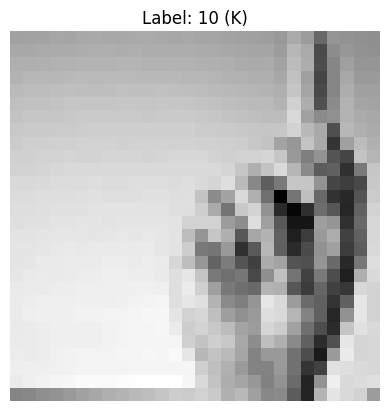

1/1 [==============================] - 0s 17ms/step
True Label: 10 (K)
First Model Prediction: 8
Second Model Prediction: 18
Third Model Prediction: 17
Fourth Model Prediction: 24
Fifth Model Prediction: 10



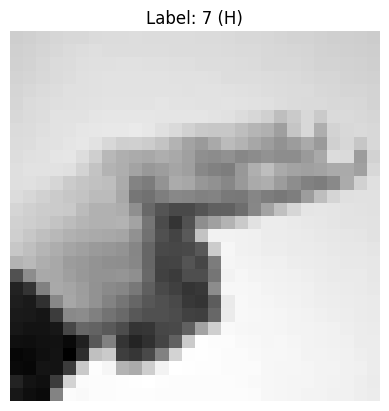

1/1 [==============================] - 0s 17ms/step
True Label: 7 (H)
First Model Prediction: 7
Second Model Prediction: 7
Third Model Prediction: 17
Fourth Model Prediction: 7
Fifth Model Prediction: 7



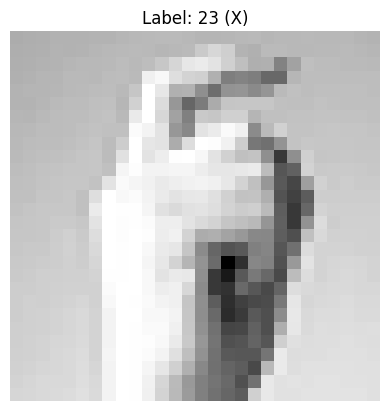

1/1 [==============================] - 0s 17ms/step
True Label: 23 (X)
First Model Prediction: 23
Second Model Prediction: 17
Third Model Prediction: 17
Fourth Model Prediction: 23
Fifth Model Prediction: 23



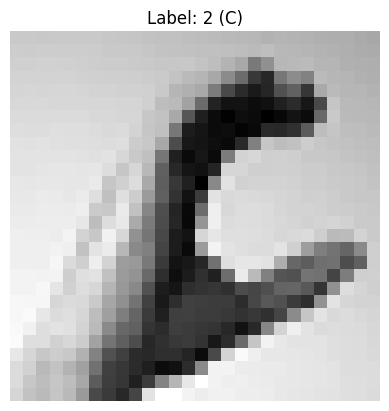

1/1 [==============================] - 0s 17ms/step
True Label: 2 (C)
First Model Prediction: 2
Second Model Prediction: 2
Third Model Prediction: 17
Fourth Model Prediction: 2
Fifth Model Prediction: 2



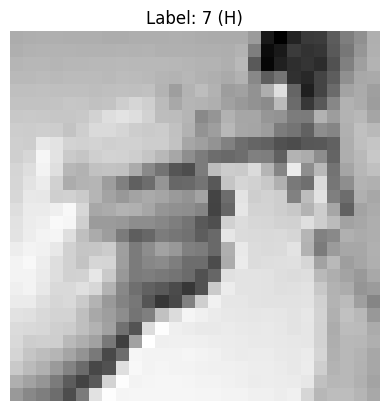

1/1 [==============================] - 0s 17ms/step
True Label: 7 (H)
First Model Prediction: 7
Second Model Prediction: 7
Third Model Prediction: 17
Fourth Model Prediction: 7
Fifth Model Prediction: 7



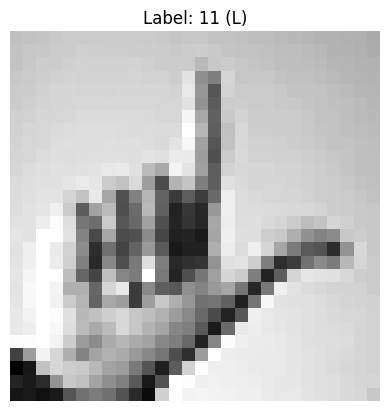

1/1 [==============================] - 0s 22ms/step
True Label: 11 (L)
First Model Prediction: 11
Second Model Prediction: 11
Third Model Prediction: 17
Fourth Model Prediction: 11
Fifth Model Prediction: 11



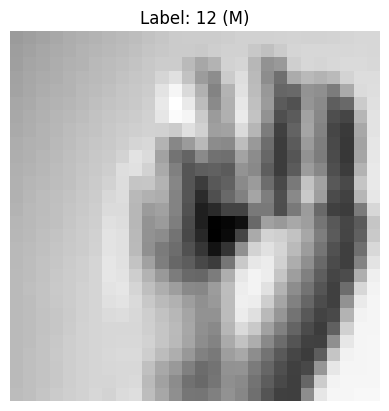

1/1 [==============================] - 0s 18ms/step
True Label: 12 (M)
First Model Prediction: 18
Second Model Prediction: 12
Third Model Prediction: 17
Fourth Model Prediction: 12
Fifth Model Prediction: 12



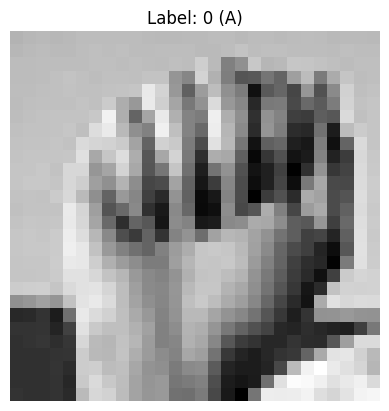

1/1 [==============================] - 0s 17ms/step
True Label: 0 (A)
First Model Prediction: 0
Second Model Prediction: 0
Third Model Prediction: 17
Fourth Model Prediction: 0
Fifth Model Prediction: 0



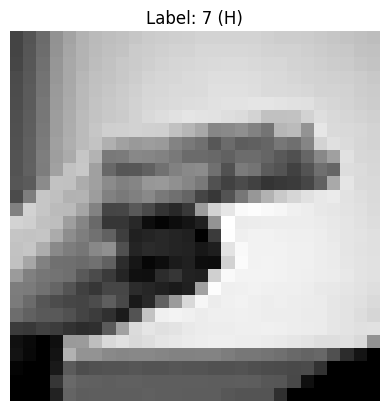

1/1 [==============================] - 0s 16ms/step
True Label: 7 (H)
First Model Prediction: 12
Second Model Prediction: 7
Third Model Prediction: 17
Fourth Model Prediction: 7
Fifth Model Prediction: 7



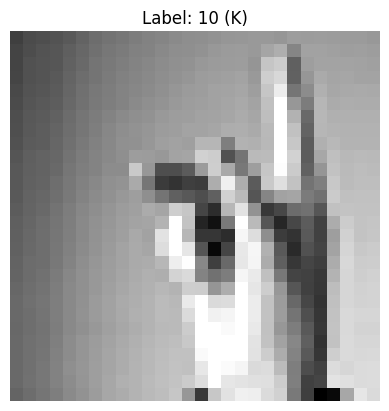

1/1 [==============================] - 0s 17ms/step
True Label: 10 (K)
First Model Prediction: 10
Second Model Prediction: 10
Third Model Prediction: 17
Fourth Model Prediction: 10
Fifth Model Prediction: 10



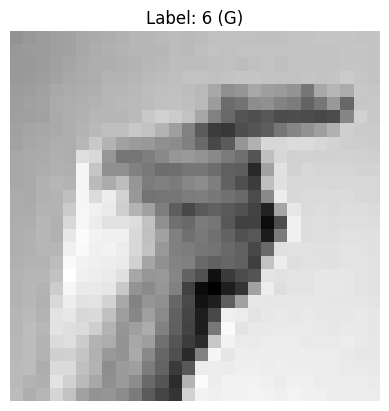

1/1 [==============================] - 0s 17ms/step
True Label: 6 (G)
First Model Prediction: 6
Second Model Prediction: 6
Third Model Prediction: 17
Fourth Model Prediction: 6
Fifth Model Prediction: 6



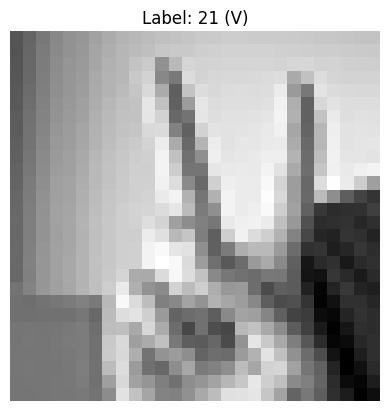

1/1 [==============================] - 0s 17ms/step
True Label: 21 (V)
First Model Prediction: 22
Second Model Prediction: 22
Third Model Prediction: 17
Fourth Model Prediction: 21
Fifth Model Prediction: 22



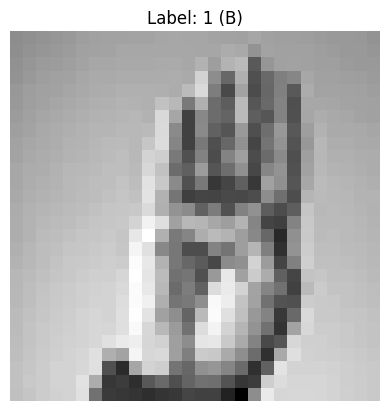

1/1 [==============================] - 0s 18ms/step
True Label: 1 (B)
First Model Prediction: 1
Second Model Prediction: 1
Third Model Prediction: 17
Fourth Model Prediction: 1
Fifth Model Prediction: 1



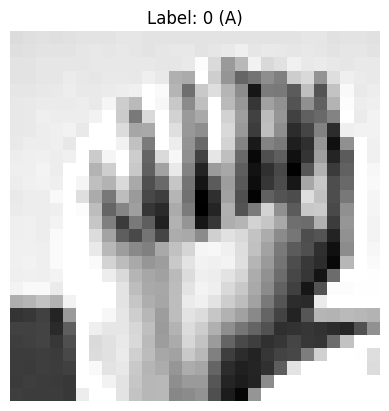

1/1 [==============================] - 0s 18ms/step
True Label: 0 (A)
First Model Prediction: 0
Second Model Prediction: 0
Third Model Prediction: 17
Fourth Model Prediction: 0
Fifth Model Prediction: 0



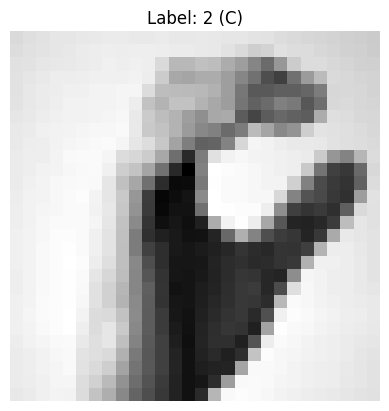

1/1 [==============================] - 0s 20ms/step
True Label: 2 (C)
First Model Prediction: 2
Second Model Prediction: 2
Third Model Prediction: 17
Fourth Model Prediction: 2
Fifth Model Prediction: 2



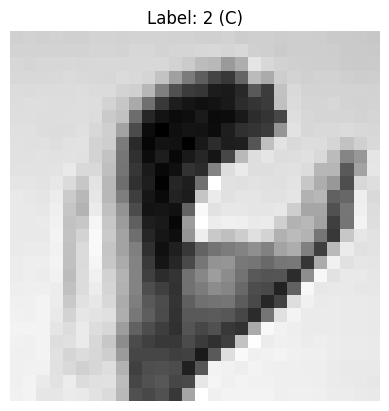

1/1 [==============================] - 0s 18ms/step
True Label: 2 (C)
First Model Prediction: 2
Second Model Prediction: 2
Third Model Prediction: 17
Fourth Model Prediction: 2
Fifth Model Prediction: 2



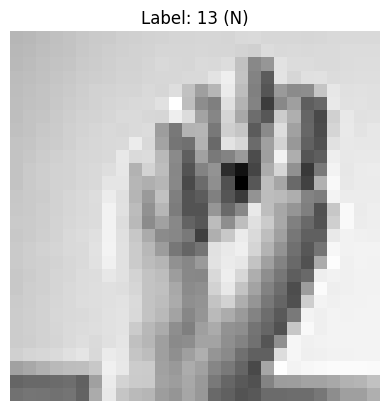

1/1 [==============================] - 0s 17ms/step
True Label: 13 (N)
First Model Prediction: 13
Second Model Prediction: 13
Third Model Prediction: 17
Fourth Model Prediction: 13
Fifth Model Prediction: 13



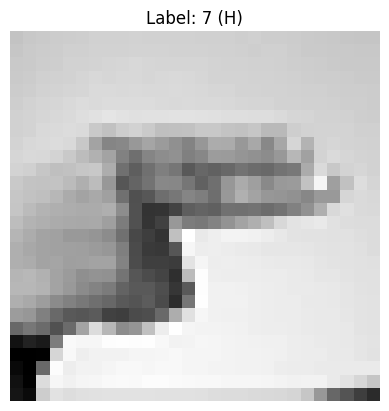

1/1 [==============================] - 0s 18ms/step
True Label: 7 (H)
First Model Prediction: 7
Second Model Prediction: 7
Third Model Prediction: 17
Fourth Model Prediction: 7
Fifth Model Prediction: 7



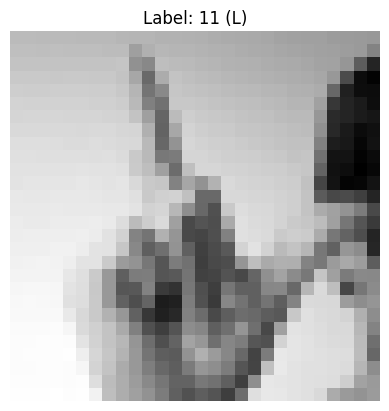

1/1 [==============================] - 0s 17ms/step
True Label: 11 (L)
First Model Prediction: 5
Second Model Prediction: 11
Third Model Prediction: 17
Fourth Model Prediction: 11
Fifth Model Prediction: 11



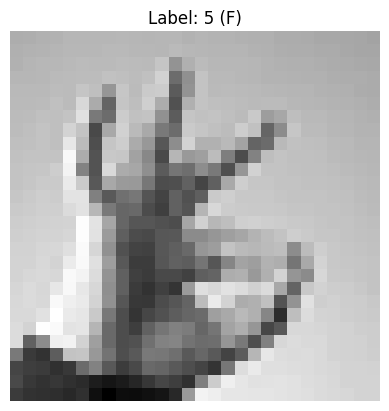

1/1 [==============================] - 0s 24ms/step
True Label: 5 (F)
First Model Prediction: 5
Second Model Prediction: 19
Third Model Prediction: 17
Fourth Model Prediction: 2
Fifth Model Prediction: 5



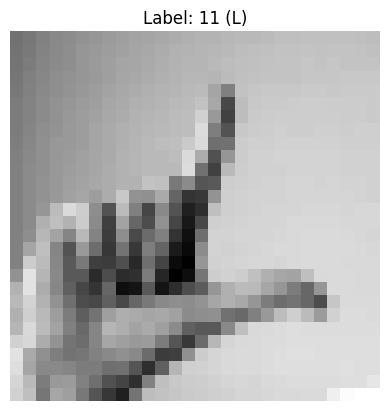

1/1 [==============================] - 0s 26ms/step
True Label: 11 (L)
First Model Prediction: 11
Second Model Prediction: 11
Third Model Prediction: 17
Fourth Model Prediction: 11
Fifth Model Prediction: 11



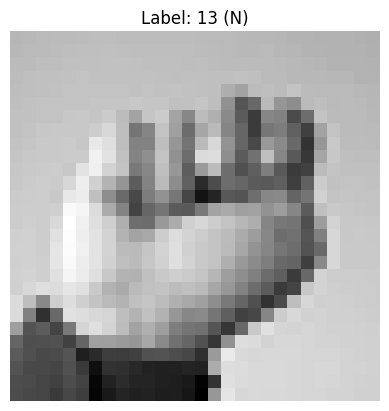

1/1 [==============================] - 0s 29ms/step
True Label: 13 (N)
First Model Prediction: 0
Second Model Prediction: 13
Third Model Prediction: 17
Fourth Model Prediction: 12
Fifth Model Prediction: 13



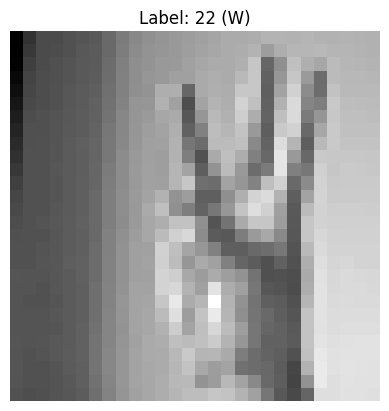

1/1 [==============================] - 0s 30ms/step
True Label: 22 (W)
First Model Prediction: 22
Second Model Prediction: 22
Third Model Prediction: 17
Fourth Model Prediction: 22
Fifth Model Prediction: 10



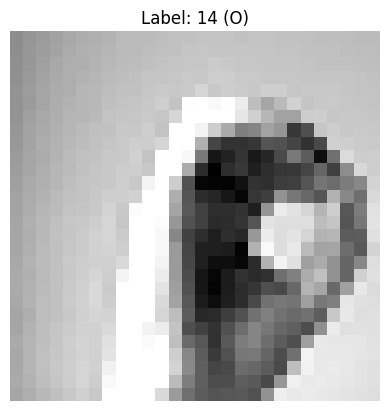

1/1 [==============================] - 0s 26ms/step
True Label: 14 (O)
First Model Prediction: 19
Second Model Prediction: 19
Third Model Prediction: 17
Fourth Model Prediction: 19
Fifth Model Prediction: 6



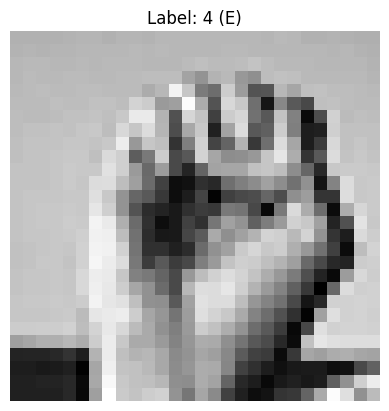

1/1 [==============================] - 0s 16ms/step
True Label: 4 (E)
First Model Prediction: 4
Second Model Prediction: 4
Third Model Prediction: 17
Fourth Model Prediction: 4
Fifth Model Prediction: 4



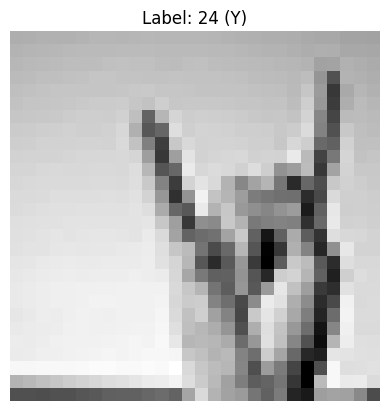

1/1 [==============================] - 0s 17ms/step
True Label: 24 (Y)
First Model Prediction: 8
Second Model Prediction: 18
Third Model Prediction: 17
Fourth Model Prediction: 21
Fifth Model Prediction: 21



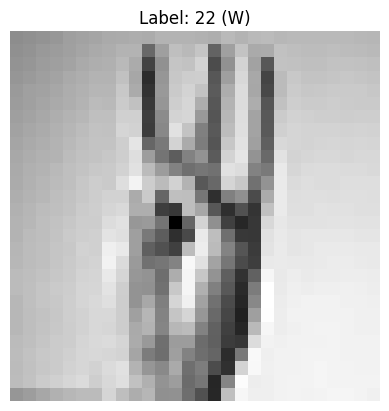

1/1 [==============================] - 0s 17ms/step
True Label: 22 (W)
First Model Prediction: 22
Second Model Prediction: 20
Third Model Prediction: 17
Fourth Model Prediction: 20
Fifth Model Prediction: 20



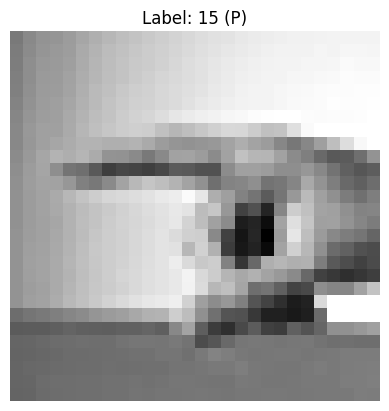

1/1 [==============================] - 0s 17ms/step
True Label: 15 (P)
First Model Prediction: 15
Second Model Prediction: 15
Third Model Prediction: 17
Fourth Model Prediction: 15
Fifth Model Prediction: 15



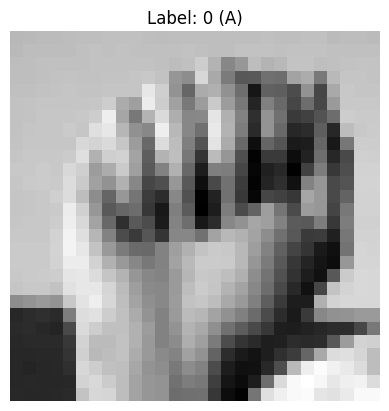

1/1 [==============================] - 0s 17ms/step
True Label: 0 (A)
First Model Prediction: 0
Second Model Prediction: 0
Third Model Prediction: 17
Fourth Model Prediction: 0
Fifth Model Prediction: 0



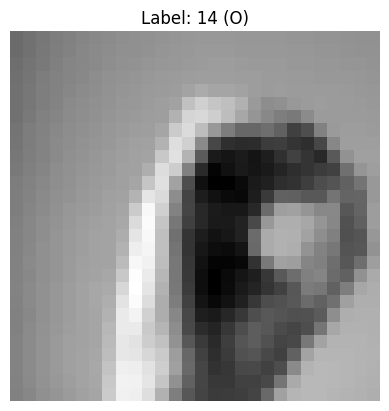

1/1 [==============================] - 0s 22ms/step
True Label: 14 (O)
First Model Prediction: 7
Second Model Prediction: 16
Third Model Prediction: 17
Fourth Model Prediction: 6
Fifth Model Prediction: 16



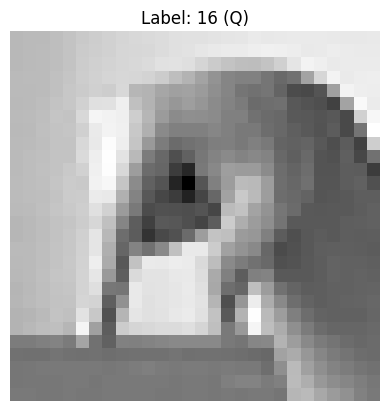

1/1 [==============================] - 0s 17ms/step
True Label: 16 (Q)
First Model Prediction: 0
Second Model Prediction: 12
Third Model Prediction: 17
Fourth Model Prediction: 12
Fifth Model Prediction: 16



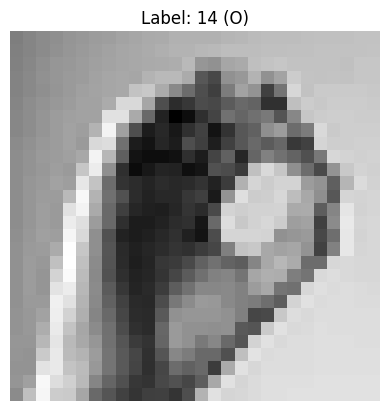

1/1 [==============================] - 0s 17ms/step
True Label: 14 (O)
First Model Prediction: 14
Second Model Prediction: 14
Third Model Prediction: 17
Fourth Model Prediction: 14
Fifth Model Prediction: 14



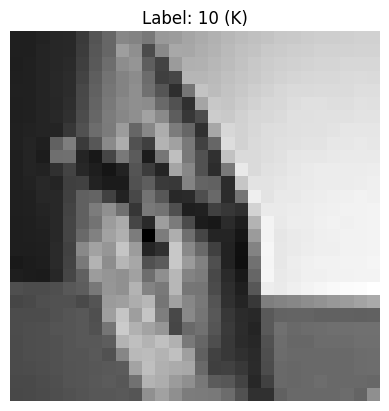

1/1 [==============================] - 0s 17ms/step
True Label: 10 (K)
First Model Prediction: 10
Second Model Prediction: 5
Third Model Prediction: 17
Fourth Model Prediction: 10
Fifth Model Prediction: 10



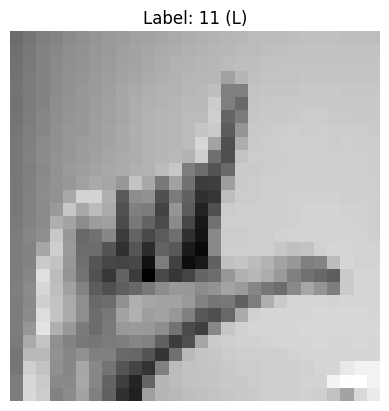

1/1 [==============================] - 0s 17ms/step
True Label: 11 (L)
First Model Prediction: 11
Second Model Prediction: 11
Third Model Prediction: 17
Fourth Model Prediction: 11
Fifth Model Prediction: 11



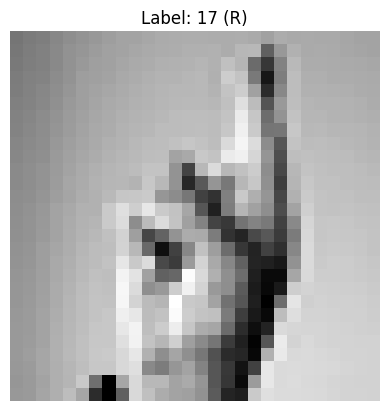

1/1 [==============================] - 0s 22ms/step
True Label: 17 (R)
First Model Prediction: 17
Second Model Prediction: 17
Third Model Prediction: 17
Fourth Model Prediction: 17
Fifth Model Prediction: 17



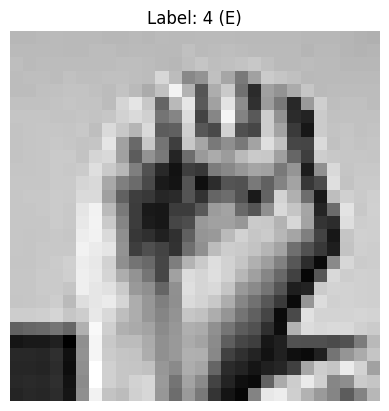

1/1 [==============================] - 0s 18ms/step
True Label: 4 (E)
First Model Prediction: 4
Second Model Prediction: 4
Third Model Prediction: 17
Fourth Model Prediction: 4
Fifth Model Prediction: 4



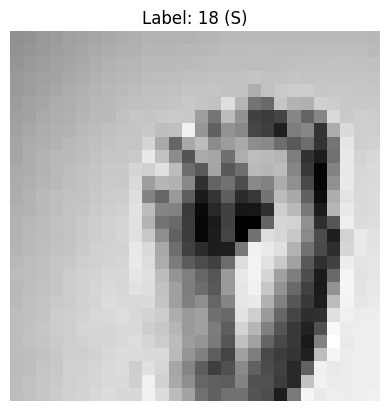

1/1 [==============================] - 0s 17ms/step
True Label: 18 (S)
First Model Prediction: 12
Second Model Prediction: 12
Third Model Prediction: 17
Fourth Model Prediction: 12
Fifth Model Prediction: 12



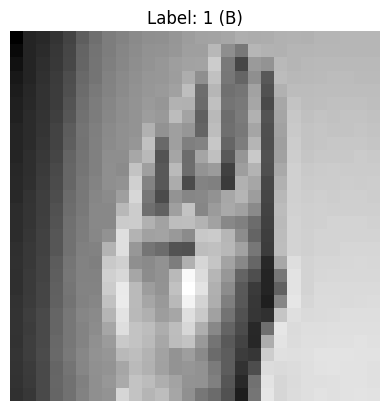

1/1 [==============================] - 0s 17ms/step
True Label: 1 (B)
First Model Prediction: 1
Second Model Prediction: 1
Third Model Prediction: 17
Fourth Model Prediction: 1
Fifth Model Prediction: 1



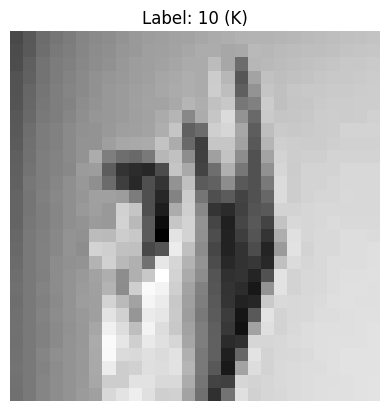

1/1 [==============================] - 0s 19ms/step
True Label: 10 (K)
First Model Prediction: 10
Second Model Prediction: 10
Third Model Prediction: 17
Fourth Model Prediction: 10
Fifth Model Prediction: 10



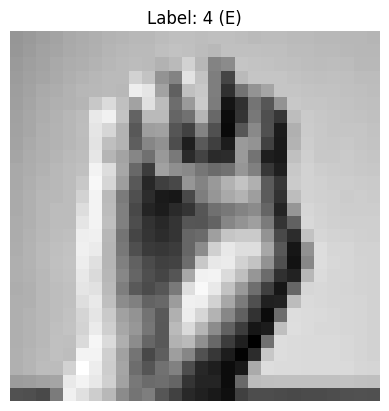

1/1 [==============================] - 0s 16ms/step
True Label: 4 (E)
First Model Prediction: 4
Second Model Prediction: 4
Third Model Prediction: 17
Fourth Model Prediction: 4
Fifth Model Prediction: 4



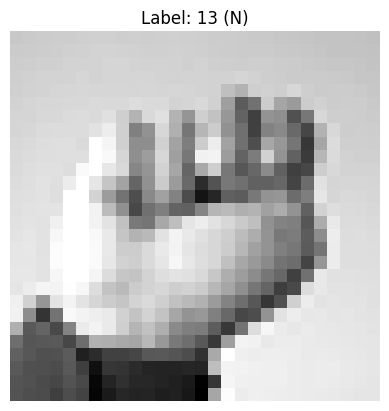

1/1 [==============================] - 0s 17ms/step
True Label: 13 (N)
First Model Prediction: 0
Second Model Prediction: 13
Third Model Prediction: 17
Fourth Model Prediction: 12
Fifth Model Prediction: 0



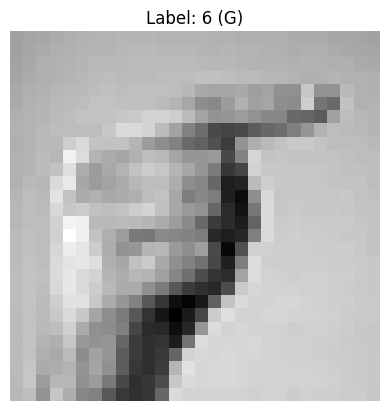

1/1 [==============================] - 0s 17ms/step
True Label: 6 (G)
First Model Prediction: 6
Second Model Prediction: 6
Third Model Prediction: 17
Fourth Model Prediction: 6
Fifth Model Prediction: 6



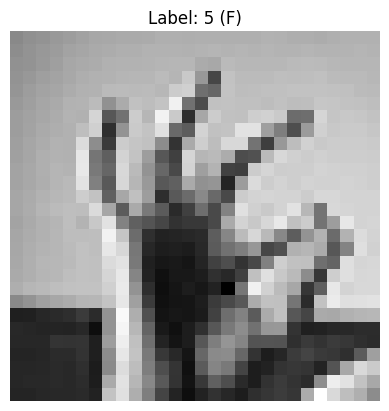

1/1 [==============================] - 0s 16ms/step
True Label: 5 (F)
First Model Prediction: 5
Second Model Prediction: 5
Third Model Prediction: 17
Fourth Model Prediction: 5
Fifth Model Prediction: 5



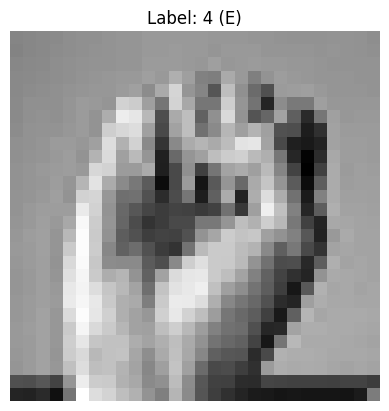

1/1 [==============================] - 0s 22ms/step
True Label: 4 (E)
First Model Prediction: 18
Second Model Prediction: 18
Third Model Prediction: 17
Fourth Model Prediction: 4
Fifth Model Prediction: 18



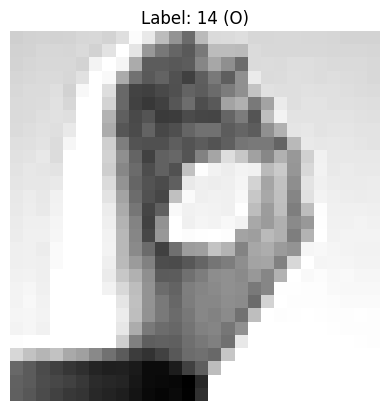

1/1 [==============================] - 0s 20ms/step
True Label: 14 (O)
First Model Prediction: 14
Second Model Prediction: 14
Third Model Prediction: 17
Fourth Model Prediction: 14
Fifth Model Prediction: 14



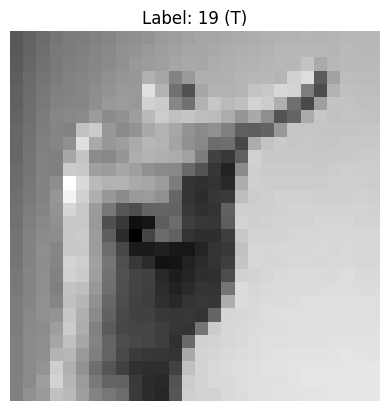

1/1 [==============================] - 0s 23ms/step
True Label: 19 (T)
First Model Prediction: 19
Second Model Prediction: 19
Third Model Prediction: 17
Fourth Model Prediction: 19
Fifth Model Prediction: 19



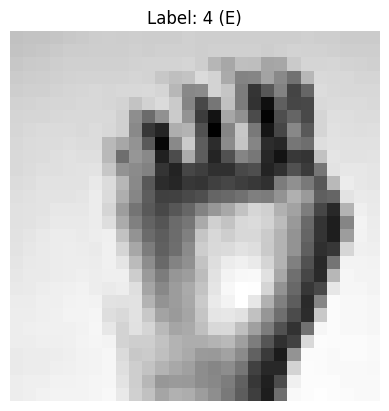

1/1 [==============================] - 0s 17ms/step
True Label: 4 (E)
First Model Prediction: 4
Second Model Prediction: 4
Third Model Prediction: 17
Fourth Model Prediction: 4
Fifth Model Prediction: 4



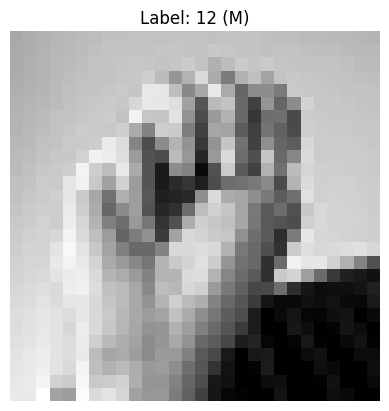

1/1 [==============================] - 0s 29ms/step
True Label: 12 (M)
First Model Prediction: 18
Second Model Prediction: 12
Third Model Prediction: 17
Fourth Model Prediction: 12
Fifth Model Prediction: 12



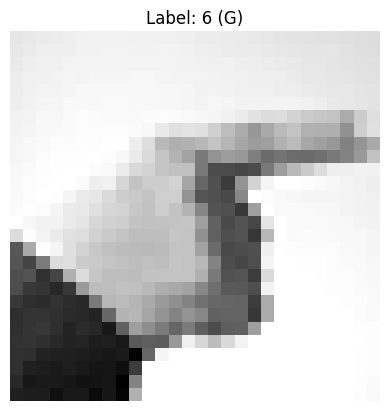

1/1 [==============================] - 0s 24ms/step
True Label: 6 (G)
First Model Prediction: 6
Second Model Prediction: 6
Third Model Prediction: 17
Fourth Model Prediction: 6
Fifth Model Prediction: 6



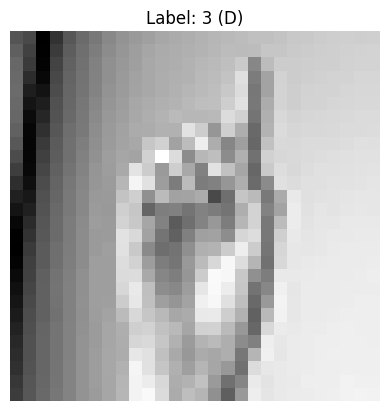

1/1 [==============================] - 0s 30ms/step
True Label: 3 (D)
First Model Prediction: 3
Second Model Prediction: 3
Third Model Prediction: 17
Fourth Model Prediction: 3
Fifth Model Prediction: 3



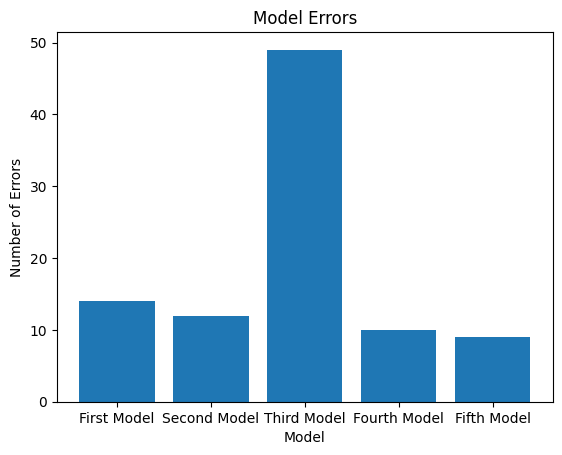

In [ ]:
# Seleccionar varias imágenes aleatorias del conjunto de datos de prueba
num_samples = 50
sample_indices = np.random.randint(0, test_x.shape[0], num_samples)

# Inicializar contadores de errores
first_model_errors = 0
second_model_errors = 0
third_model_errors = 0
fourth_model_errors = 0
fifth_model_errors = 0

# Mostrar las imágenes seleccionadas y contar errores
for i, index in enumerate(sample_indices):
    sample_image = test_x[index]
    sample_label = test_y[index]
    letter = label_to_letter(sample_label)  # Obtener la letra correspondiente

    plt.imshow(sample_image, cmap='gray')
    plt.title(f'Label: {np.argmax(sample_label)} ({letter})')
    plt.axis('off')
    plt.show()

    # Agregar una dimensión para que el modelo acepte el input correctamente
    sample_image_expanded = np.expand_dims(sample_image, axis=0)

    # Predicción con el primer modelo
    first_prediction = first_model.predict(sample_image_expanded)
    first_predicted_label = np.argmax(first_prediction, axis=1)[0]

    # Predicción con el segundo modelo
    second_prediction = second_model.predict(sample_image_expanded)
    second_predicted_label = np.argmax(second_prediction, axis=1)[0]

    # Predicción con el tercer modelo
    third_prediction = third_model.predict(sample_image_expanded)
    third_predicted_label = np.argmax(third_prediction, axis=1)[0]

    # Predicción con el cuarto modelo
    fourth_prediction = fourth_model.predict(sample_image_expanded)
    fourth_predicted_label = np.argmax(fourth_prediction, axis=1)[0]

    # Predicción con el quinto Modelo
    fifth_prediction = fifth_model.predict(sample_image_expanded)
    fifth_predicted_label = np.argmax(fifth_prediction, axis=1)[0]

    # Contar errores
    if first_predicted_label != np.argmax(sample_label):
        first_model_errors += 1
    if second_predicted_label != np.argmax(sample_label):
        second_model_errors += 1
    if third_predicted_label != np.argmax(sample_label):
        third_model_errors += 1
    if fourth_predicted_label != np.argmax(sample_label):
        fourth_model_errors += 1
    if fifth_predicted_label != np.argmax(sample_label):
        fifth_model_errors += 1

    # Mostrar resultados
    print(f"True Label: {np.argmax(sample_label)} ({letter})")
    print(f"First Model Prediction: {first_predicted_label}")
    print(f"Second Model Prediction: {second_predicted_label}")
    print(f"Third Model Prediction: {third_predicted_label}")
    print(f"Fourth Model Prediction: {fourth_predicted_label}")
    print(f"Fifth Model Prediction: {fifth_predicted_label}")
    print()

# Mostrar gráfico de errores
plt.bar(['First Model', 'Second Model', 'Third Model', 'Fourth Model','Fifth Model'], [first_model_errors, second_model_errors, third_model_errors, fourth_model_errors, fifth_model_errors])
plt.xlabel('Model')
plt.ylabel('Number of Errors')
plt.title('Model Errors')
plt.show()


#Análisis:
Al analizar los resultados de los cinco modelos con las gráficas y las metricas, podimos observar que el modelo 5 fue el que obtuvo un mejor rendimiento en comparación con los demás, aunque con el modelo 4 tuvo gran similud de acuerdo a la tendencia de las gráficas y los resultados obtenidos el modelo 5 es el de más estabilidad y con mejor generalización de los datos.

También se observa que el modelo 3 es el de peor rendimiento, con una precisión mucho menor al 50% al tratar de predecir los datos, y apesar de que en la gráfica de pérdida la prueba tiende a disminuir esta también tiene demasiada oscilación, estos errores lo pudo ocacionar la función de activación sigmoide por ser menos efectiva en capas ocultas con tareas de clasificación de imagenes y el optimizador SGD empleados en este modelo

##Conclusiones
* Rendimiento: El modelo 5 mostró un rendimiento superior en términos de precisión, recall y exactitud.
* Estabilidad: El modelo 5 mostró mayor estabilidad en las gráficas de pérdida y precisión, con curvas de entrenamiento y validación más cercanas entre sí, lo que indica una mejor generalización.
* Generalización: El modelo 5 demostró mejor capacidad para generalizar a datos no vistos, lo cual es crucial para evitar el sobreajuste y asegurar un rendimiento consistente en diferentes conjuntos de datos.

En resumen, aunque el modelo 4 mostró un rendimiento competitivo, el modelo 5 se destaca por su mayor precisión, recall y estabilidad, lo que lo convierte en la mejor opción entre los cinco modelos analizados.

###Metricas:

*   Loss: si la perdida disminuye el modelo esta mejorando, si es al contrario el modelo esta clasificando mal los resultados.
*   Accuracy: Indica la proporción de predicciones correctas respecto al total de predicciones, si aumenta el precisión esta mejorando
* Presicion: indica la capacidad de predecir las clases, si aumenta eseta mejorando
* Recall: nos indica los casos positivos que se hicieron correctamente
* F1-score: del total de datos cuantos se clasificaron correctamente
```
Nota:
Precisión:Si la precisión del entrenamiento es mucho mayor a la de
prueba esto puede ser un indicador de que ahí un
sobreentrenamiento, es decir, el modelo esta memorizando.
Si la precisión es baja en ambos conjuntos, puede indicar
subajuste, es decir, que el modelo no ha aprendido
suficientemente los patrones en los datos de entrenamiento.
Perdidad: Si tanto la pérdida de entrenamiento como la de
validación son altas y no mejoran significativamente a lo
largo de las épocas, podría indicar que el modelo es
demasiado simple para capturar las relaciones en los datos.
Si la pérdida de entrenamiento sigue disminuyendo mientras
que la pérdida de validación comienza a aumentar, es probable
que el modelo esté memorizando los datos de entrenamiento y no
generalice bien con datos nuevos.
